Мы имеем датасет (средняя зарплата от средней стоимости дома). Изначально классов нет поэтому сначала придется классифицировать самим

Так как в дата сете рассмотрены не столько отдельные параметры одного дома дома, сколько средние параметры домов на определенной территории (насолько я понял), то описание параметров тоже будем обозначать в среднем



1.   longitude - долгота
2.   latitude - широта
3.   housing_median_age - средний возраст домов
4.   total_rooms - общая площадь
5.   total_bedrooms - общая площадь спален
6.   population - население
7.   households - домохозяйства
8.   median_income - доход
9.   median_house_value - стоимость дома
10.  ocean_proximity - близость до океана\залива



#Основная часть

In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import sklearn

Костыль, чтобы разобраться с недоступными строчками в бд

In [87]:
def i_ne_mogy(arr):
  tmp = arr.to_numpy()
  tmp = pd.Series(tmp)
  return tmp


Немного посмотрим на наш массив

In [88]:
data = pd.read_csv('housing.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [89]:
data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

Выделяем категорию и идем дальше


In [90]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')

In [91]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

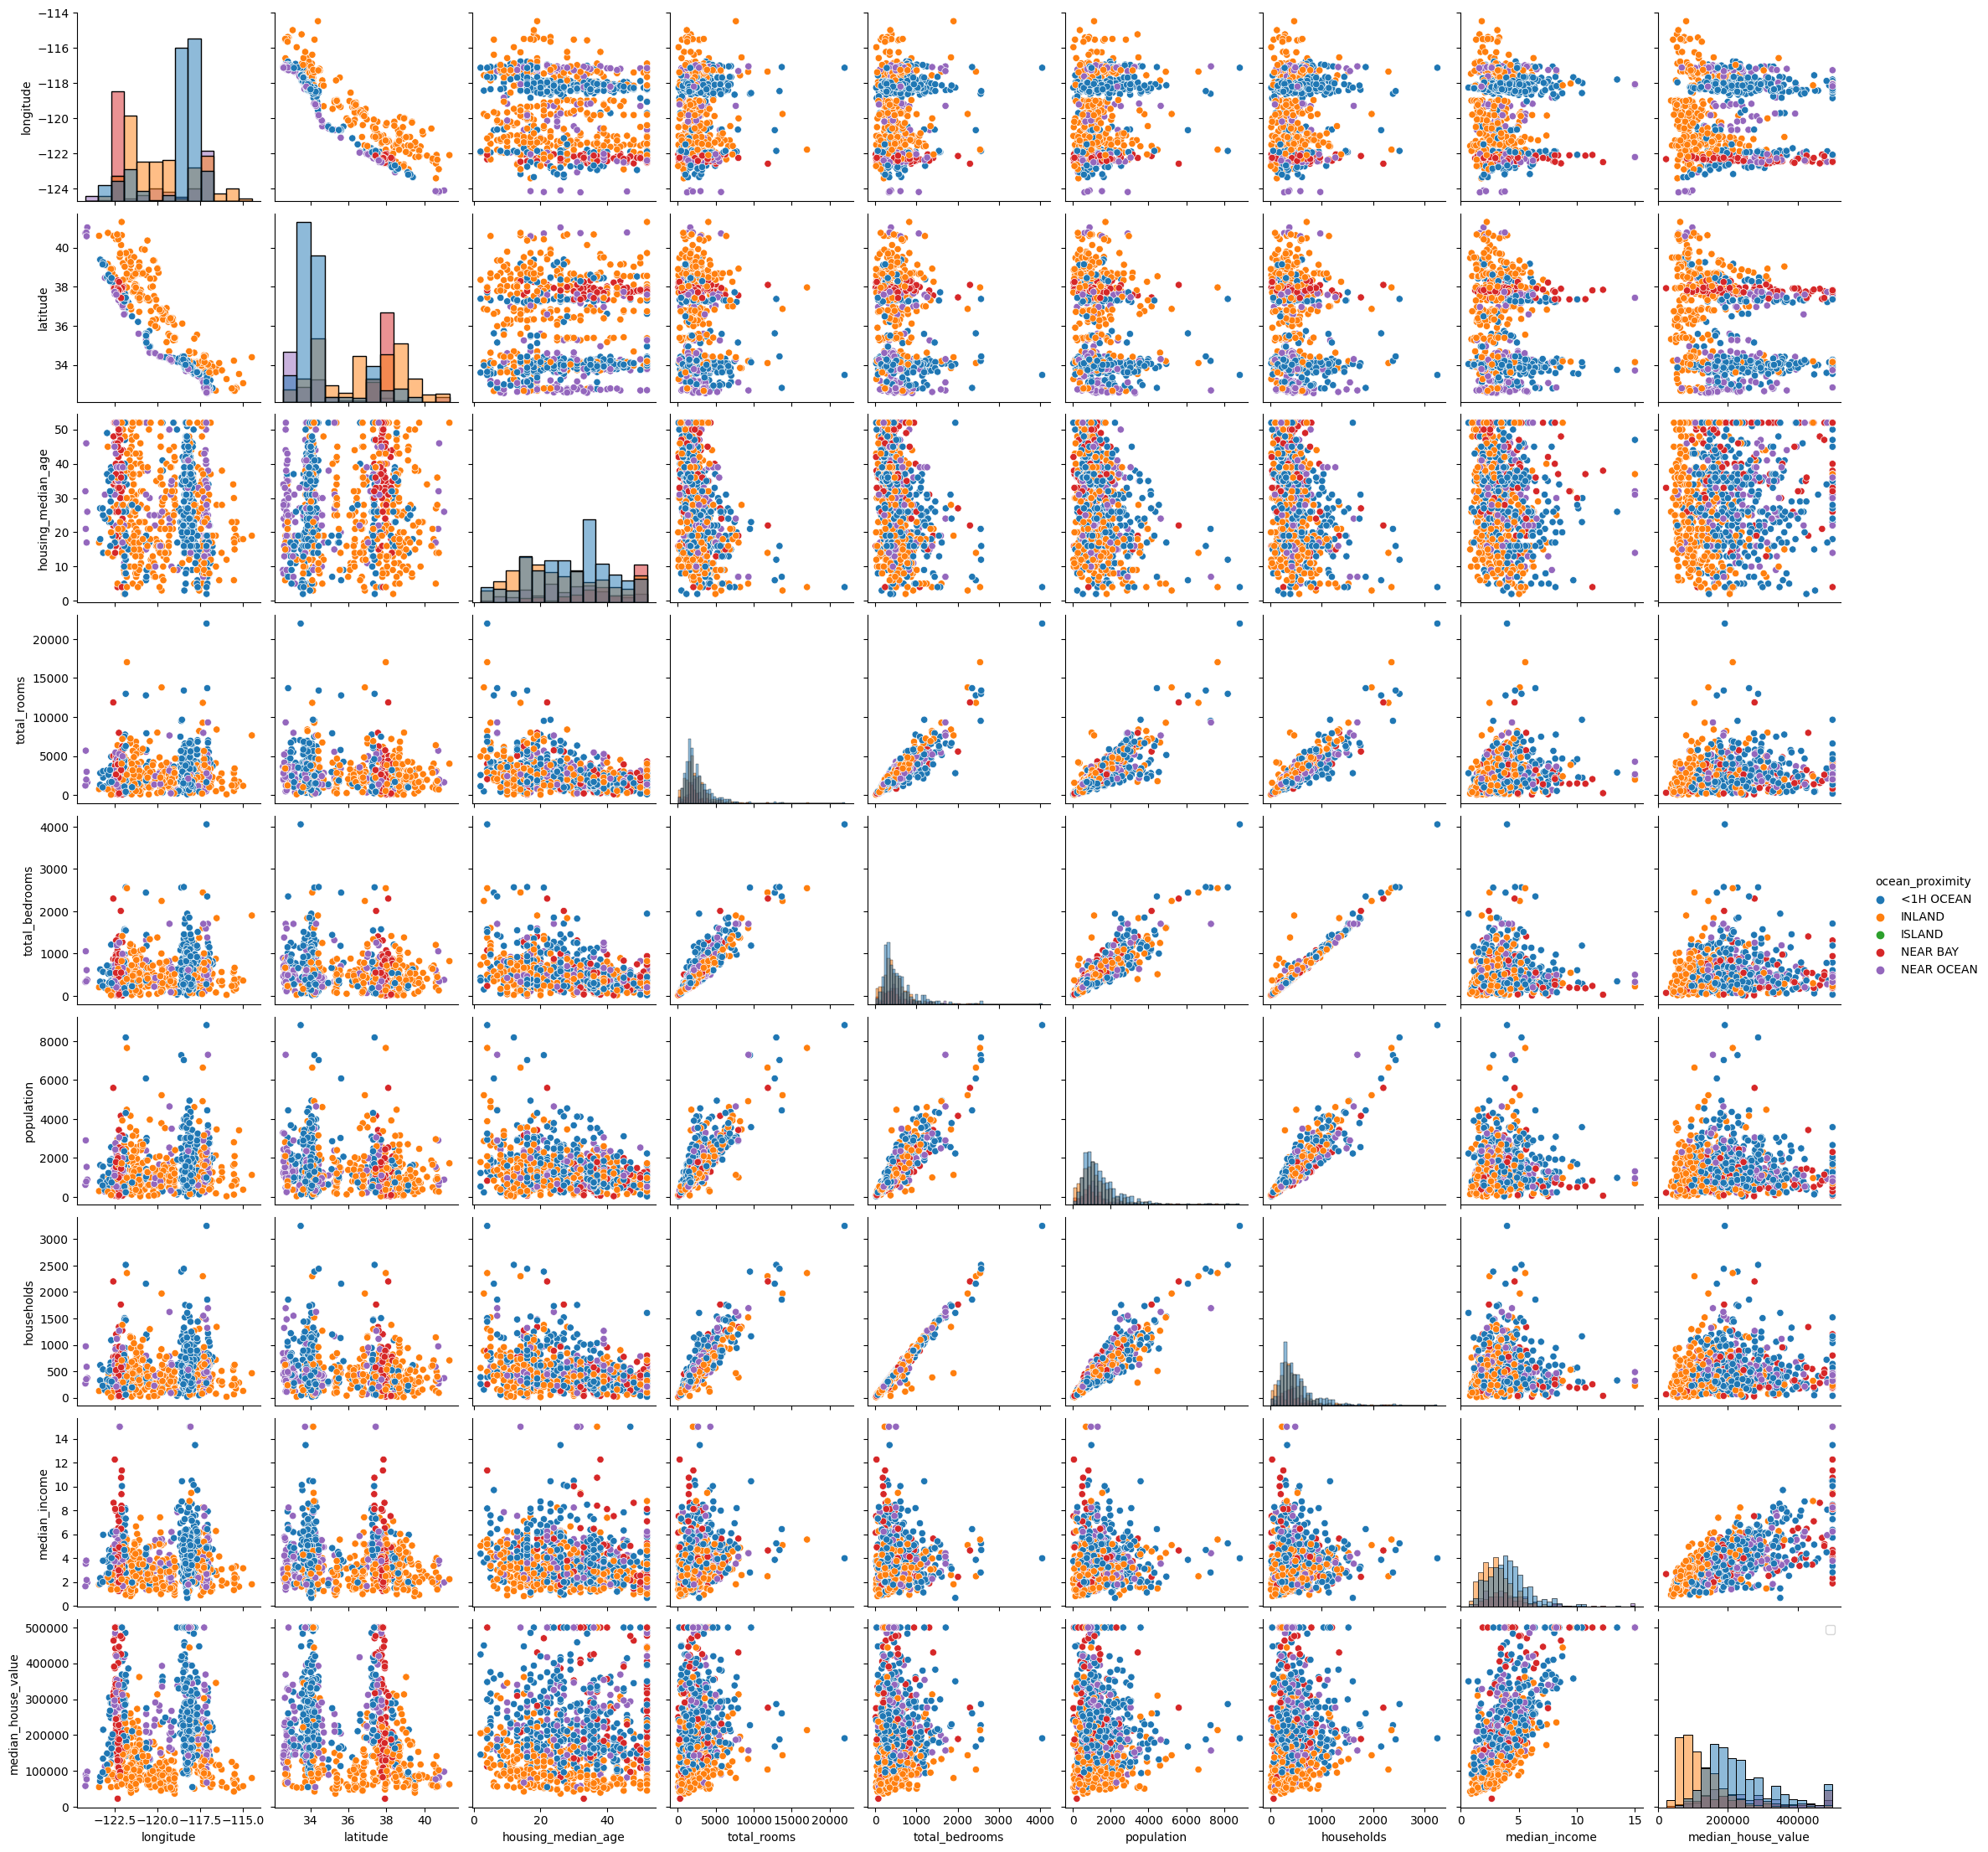

In [92]:
sns.pairplot(data.iloc[random_subset], hue = 'ocean_proximity', diag_kind='hist')
plt.legend()

Видна достаточно сильная корреляция между средним доходом и средней ценой дома.

<ipython-input-93-d65813805018>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


<Axes: >

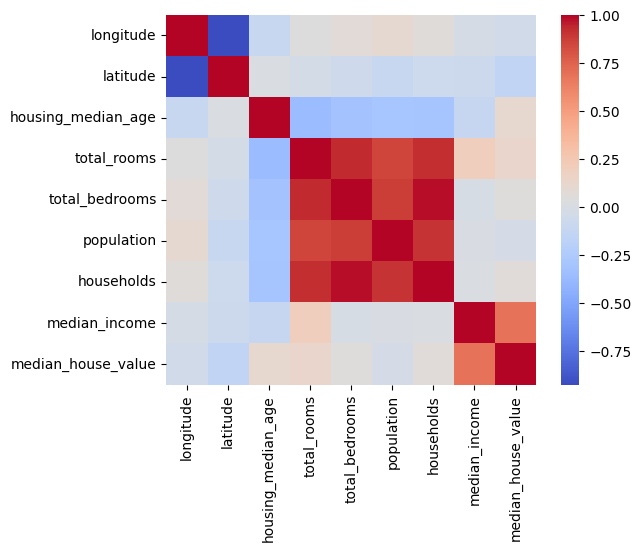

In [93]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

In [94]:
corr_mat>0.5

longitude  latitude  housing_median_age  total_rooms  \
longitude                True     False               False        False   
latitude                False      True               False        False   
housing_median_age      False     False                True        False   
total_rooms             False     False               False         True   
total_bedrooms          False     False               False         True   
population              False     False               False         True   
households              False     False               False         True   
median_income           False     False               False        False   
median_house_value      False     False               False        False   

                    total_bedrooms  population  households  median_income  \
longitude                    False       False       False          False   
latitude                     False       False       False          False   
housing_median_age           False       False       False          False   
total_rooms                   True        True        True          False   
total_bedrooms                True        True        True          False   
population                    True        True        True          False   
households                    True        True        True          False   
median_income                False       False       False           True   
median_house_value           False       False       False           True   

                    median_house_value  
longitude                        False  
latitude                         False  
housing_median_age               False  
total_rooms                      False  
total_bedrooms                   False  
population                       False  
households                       False  
median_income                     True  
median_house_value                True

Далее пытаемся избавиться от дропов

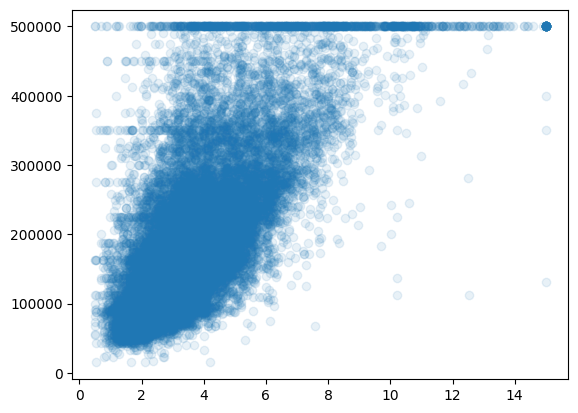

In [95]:
plt.scatter(data['median_income'], data['median_house_value'],alpha = 0.1)

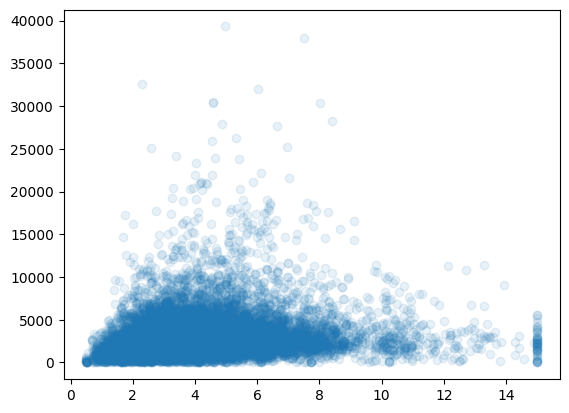

In [96]:
plt.scatter(data['median_income'], data['total_rooms'], alpha = 0.1)

<Axes: xlabel='ocean_proximity', ylabel='median_income'>

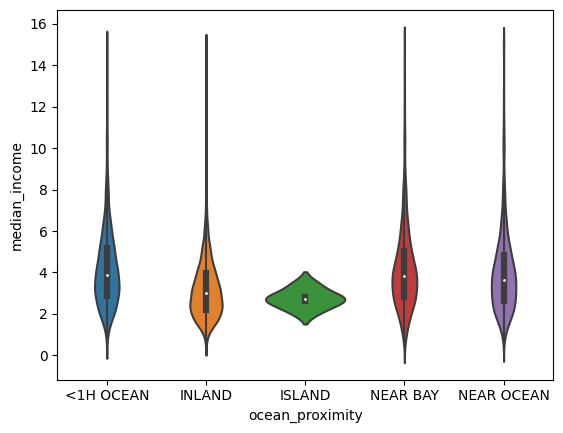

In [97]:
sns.violinplot(x="ocean_proximity", y="median_income", data=data)

In [98]:
data['median_income'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])
data['median_house_value'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])
rows_to_drop = data[
    (data['median_income'] < data['median_income'].quantile(0.005)) | (data['median_income'] > data['median_income'].quantile(0.995)) |
    (data['median_house_value']  < data['median_house_value' ].quantile(0.005)) | (data['median_house_value']  > data['median_house_value' ].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(20338, 10)

Использование костыля

In [99]:
longitude = i_ne_mogy(data['longitude'])
latitude = i_ne_mogy(data['latitude'])
housing_median_age = i_ne_mogy(data['housing_median_age'])
total_rooms = i_ne_mogy(data['total_rooms'])
total_bedrooms = i_ne_mogy(data['total_bedrooms'])
population = i_ne_mogy(data['population'])
households = i_ne_mogy(data['households'])
median_income = i_ne_mogy(data['median_income'])
median_house_value = i_ne_mogy(data['median_house_value'])
ocean_proximity = i_ne_mogy(data['ocean_proximity'])
print(len(longitude),len(latitude),len(housing_median_age),len(total_rooms),
      len(total_bedrooms),len(population),len(households),len(median_income),len(median_house_value),len(ocean_proximity))
data = pd.DataFrame({'latitude':latitude})
data['longitude'] = longitude
data['housing_median_age'] = housing_median_age
data['total_rooms'] = total_rooms
data['total_bedrooms'] = total_bedrooms
data['population'] = population
data['households'] = households
data['median_income'] = median_income
data['median_house_value'] = median_house_value
data['ocean_proximity'] = ocean_proximity
data.tail()

20338 20338 20338 20338 20338 20338 20338 20338 20338 20338


latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
20333     39.48    -121.09                25.0       1665.0           374.0   
20334     39.49    -121.21                18.0        697.0           150.0   
20335     39.43    -121.22                17.0       2254.0           485.0   
20336     39.43    -121.32                18.0       1860.0           409.0   
20337     39.37    -121.24                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20333       845.0       330.0         1.5603             78100.0   
20334       356.0       114.0         2.5568             77100.0   
20335      1007.0       433.0         1.7000             92300.0   
20336       741.0       349.0         1.8672             84700.0   
20337      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20333          INLAND  
20334          INLAND  
20335          INLAND  
20336          INLAND  
20337          INLAND

Все, больше не используем костыли

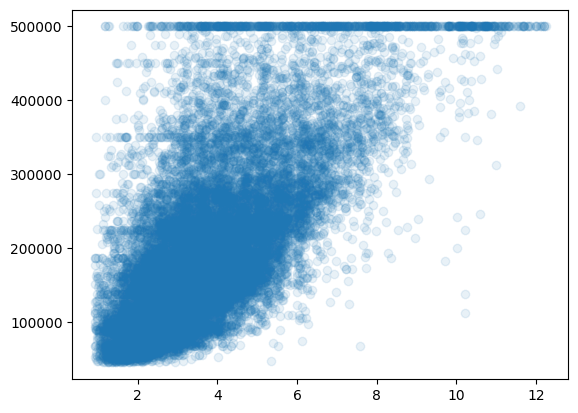

In [100]:
plt.scatter(data['median_income'], data['median_house_value'], alpha = 0.1)

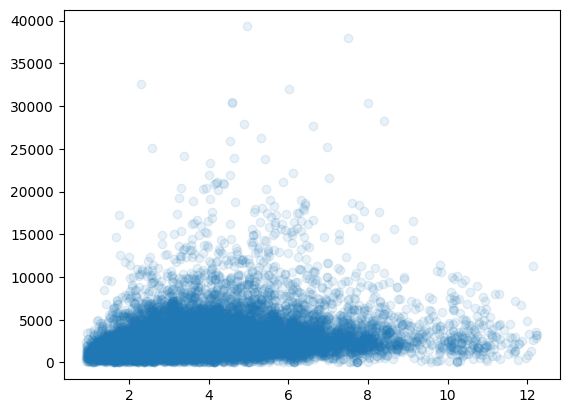

In [101]:
plt.scatter(data['median_income'], data['total_rooms'], alpha = 0.1)

<Axes: xlabel='ocean_proximity', ylabel='median_income'>

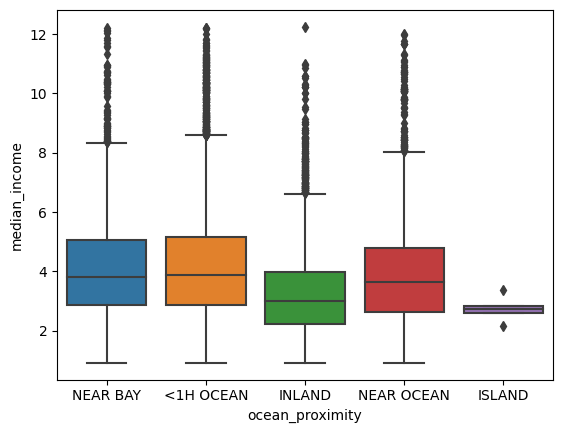

In [102]:
sns.boxplot(x="ocean_proximity", y="median_income", data=data)

Видна небольшая зависимость от того, где дом продается, выделяются дома, которые расположены "вне досягаемости до воды". Цена на них ниже

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

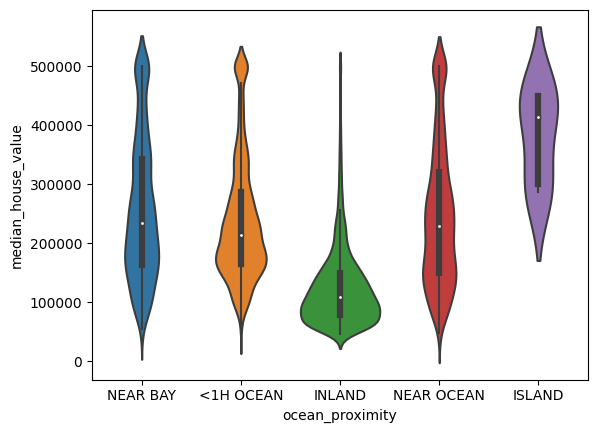

In [103]:
sns.violinplot(x="ocean_proximity", y="median_house_value", data=data)

In [104]:
data_new = data

Ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'])
data_new = pd.concat((data_new, Ocean_proximity_dummies), axis=1)

data_new = data_new.drop(['ocean_proximity'], axis=1)
data_new = data_new.drop(['longitude'], axis=1)
data_new = data_new.drop(['latitude'], axis=1)


In [105]:
tmp = data_new[data_new["INLAND"] == 1]
tmp = tmp.drop(['ISLAND'], axis=1)
tmp = tmp.drop(['NEAR BAY'], axis=1)
tmp = tmp.drop(['NEAR OCEAN'], axis=1)
tmp = tmp.drop(['<1H OCEAN'], axis=1)

In [106]:
random_subset = np.random.choice(np.arange(tmp.shape[0]), size=100, replace=False)

посмотрим о возможные корреляции

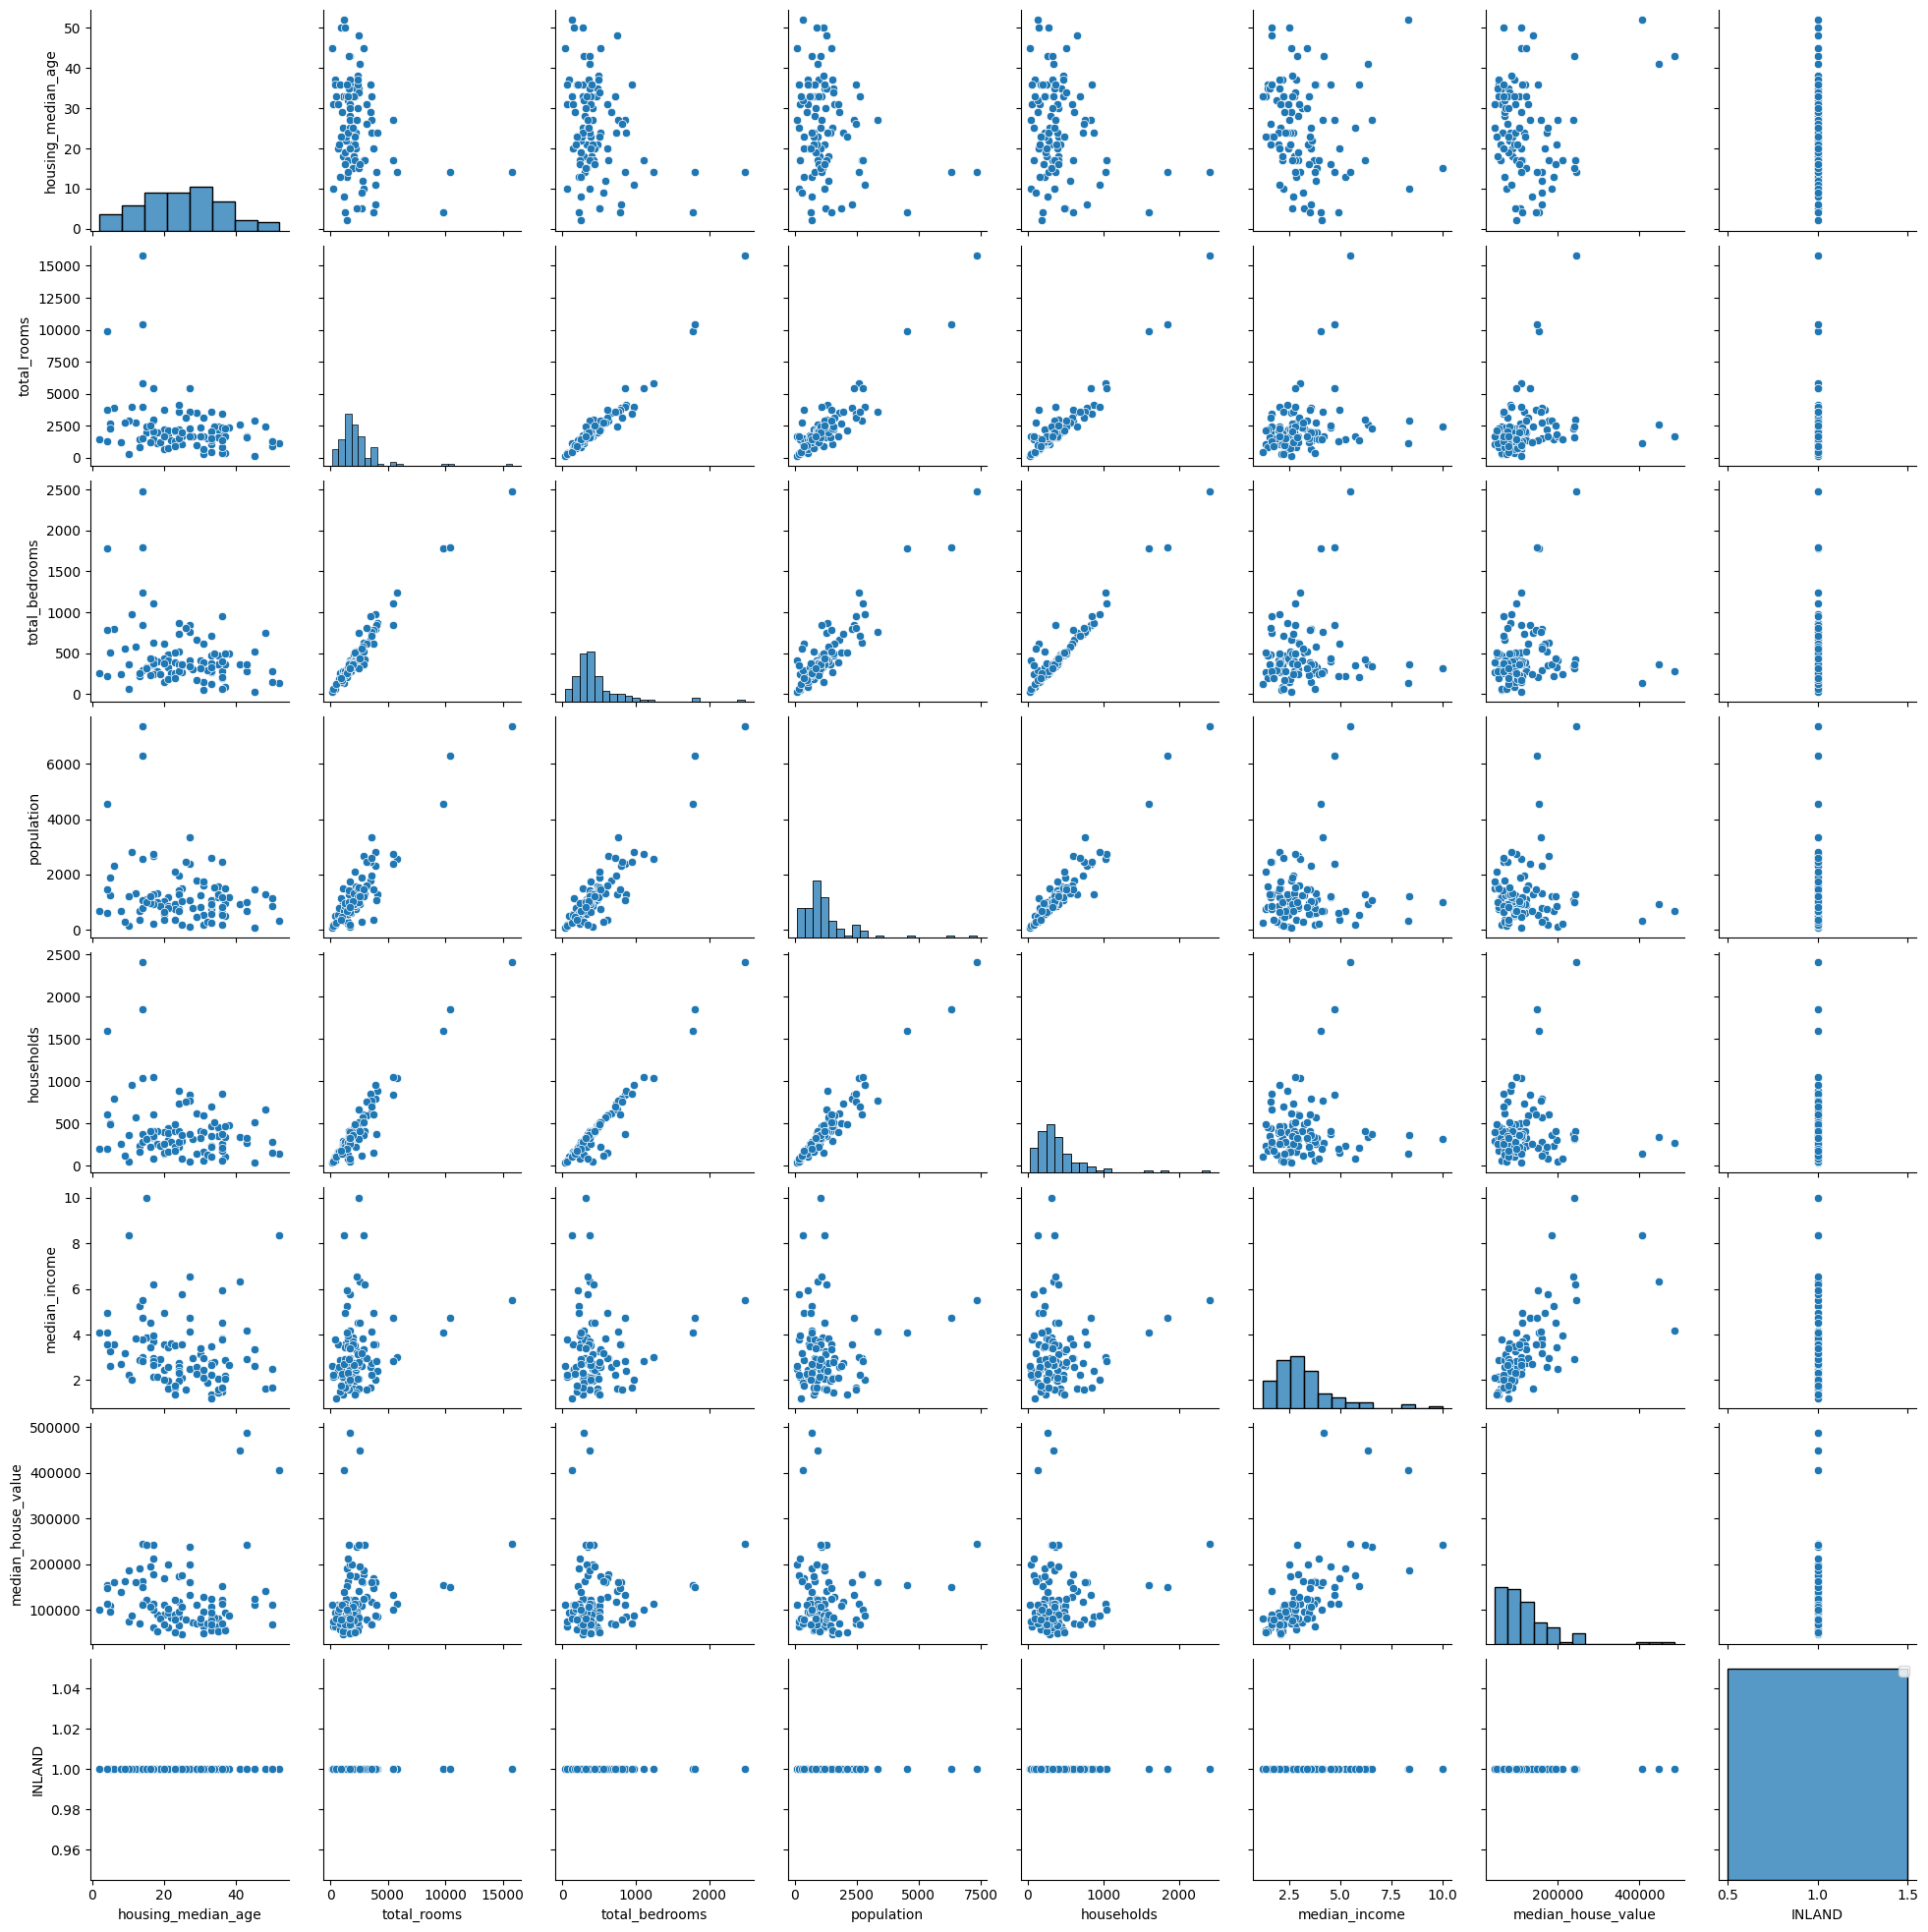

In [107]:

sns.pairplot(tmp.iloc[random_subset], diag_kind='hist')
plt.legend()

housing_median_age  total_rooms  total_bedrooms  \
housing_median_age                True        False           False   
total_rooms                      False         True            True   
total_bedrooms                   False         True            True   
population                       False         True            True   
households                       False         True            True   
median_income                    False        False           False   
median_house_value               False        False           False   
INLAND                           False        False           False   

                    population  households  median_income  median_house_value  \
housing_median_age       False       False          False               False   
total_rooms               True        True          False               False   
total_bedrooms            True        True          False               False   
population                True        True          False               False   
households                True        True          False               False   
median_income            False       False           True                True   
median_house_value       False       False           True                True   
INLAND                   False       False          False               False   

                    INLAND  
housing_median_age   False  
total_rooms          False  
total_bedrooms       False  
population           False  
households           False  
median_income        False  
median_house_value   False  
INLAND               False

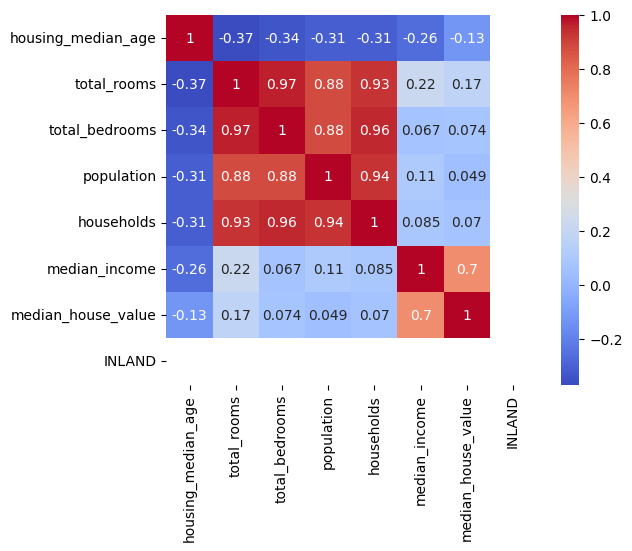

In [108]:
corr_mat = tmp.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm',annot=True)
corr_mat > 0.5

Избавляемся от пустых значений

In [109]:
data_new.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        205
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [110]:
data_new['total_bedrooms'].fillna(data_new['total_bedrooms'].mode().iloc[0], inplace=True)

In [111]:
data_new.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Стандартизируем

In [112]:
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

In [113]:
data_stand.describe()

housing_median_age   total_rooms  total_bedrooms    population  \
count        20338.000000  2.033800e+04    2.033800e+04  2.033800e+04   
mean             0.000000 -8.978734e-17   -1.117975e-16  4.751392e-17   
std              1.000000  1.000000e+00    1.000000e+00  1.000000e+00   
min             -2.196795 -1.213191e+00   -1.275869e+00 -1.261735e+00   
25%             -0.843328 -5.445286e-01   -5.810152e-01 -5.656597e-01   
50%              0.032444 -2.340290e-01   -2.478660e-01 -2.307744e-01   
75%              0.669370  2.332099e-01    2.566172e-01  2.641483e-01   
max              1.863606  1.680633e+01    1.405613e+01  3.028246e+01   

         households  median_income  median_house_value     <1H OCEAN  \
count  2.033800e+04   2.033800e+04        2.033800e+04  2.033800e+04   
mean   5.589873e-17   2.291848e-16       -3.353924e-17 -1.145924e-16   
std    1.000000e+00   1.000000e+00        1.000000e+00  1.000000e+00   
min   -1.308616e+00  -1.671268e+00       -1.418800e+00 -8.940392e-01   
25%   -5.764650e-01  -7.225214e-01       -7.552029e-01 -8.940392e-01   
50%   -2.365378e-01  -1.717476e-01       -2.326089e-01 -8.940392e-01   
75%    2.733531e-01   5.104870e-01        5.058967e-01  1.118464e+00   
max    1.458952e+01   4.808145e+00        2.586588e+00  1.118464e+00   

             INLAND        ISLAND      NEAR BAY    NEAR OCEAN  
count  20338.000000  2.033800e+04  2.033800e+04  2.033800e+04  
mean       0.000000  1.397468e-18 -6.987341e-17 -2.235949e-17  
std        1.000000  1.000000e+00  1.000000e+00  1.000000e+00  
min       -0.679077 -1.568099e-02 -3.529479e-01 -3.850374e-01  
25%       -0.679077 -1.568099e-02 -3.529479e-01 -3.850374e-01  
50%       -0.679077 -1.568099e-02 -3.529479e-01 -3.850374e-01  
75%        1.472515 -1.568099e-02 -3.529479e-01 -3.850374e-01  
max        1.472515  6.376833e+01  2.833140e+00  2.597023e+00

In [114]:
data_stand

housing_median_age  total_rooms  total_bedrooms  population  \
0                0.987833    -0.810802       -0.973655   -0.982332   
1               -0.604481     2.039378        1.351250    0.855889   
2                1.863606    -0.541779       -0.828497   -0.828484   
3                1.863606    -0.630231       -0.721414   -0.773664   
4                1.863606    -0.468450       -0.614330   -0.767475   
...                   ...          ...             ...         ...   
20333           -0.286018    -0.451035       -0.390644   -0.519903   
20334           -0.843328    -0.894671       -0.923683   -0.952270   
20335           -0.922944    -0.181095       -0.126504   -0.376665   
20336           -0.843328    -0.361666       -0.307357   -0.611858   
20337           -1.002560     0.062263        0.185228   -0.040675   

       households  median_income  median_house_value  <1H OCEAN    INLAND  \
0       -0.984378       2.563913            2.168856  -0.894039 -0.679077   
1        1.661825       2.550297            1.339580  -0.894039 -0.679077   
2       -0.851022       1.952995            1.283178  -0.894039 -0.679077   
3       -0.741199       1.029408            1.188001  -0.894039 -0.679077   
4       -0.636606       0.001350            1.195932  -0.894039 -0.679077   
...           ...            ...                 ...        ...       ...   
20333   -0.450953      -1.306479           -1.131506  -0.894039  1.472515   
20334   -1.015756      -0.736353           -1.140319  -0.894039  1.472515   
20335   -0.181626      -1.226552           -1.006365  -0.894039  1.472515   
20336   -0.401272      -1.130892           -1.073342  -0.894039  1.472515   
20337    0.072012      -0.832585           -1.031922  -0.894039  1.472515   

         ISLAND  NEAR BAY  NEAR OCEAN  
0     -0.015681  2.833140   -0.385037  
1     -0.015681  2.833140   -0.385037  
2     -0.015681  2.833140   -0.385037  
3     -0.015681  2.833140   -0.385037  
4     -0.015681  2.833140   -0.385037  
...         ...       ...         ...  
20333 -0.015681 -0.352948   -0.385037  
20334 -0.015681 -0.352948   -0.385037  
20335 -0.015681 -0.352948   -0.385037  
20336 -0.015681 -0.352948   -0.385037  
20337 -0.015681 -0.352948   -0.385037  

[20338 rows x 12 columns]

housing_median_age  total_rooms  total_bedrooms  \
housing_median_age                True        False           False   
total_rooms                      False         True            True   
total_bedrooms                   False         True            True   
population                       False         True            True   
households                       False         True            True   
median_income                    False         True           False   
median_house_value                True         True           False   
<1H OCEAN                        False        False           False   
INLAND                           False        False           False   
ISLAND                           False        False           False   
NEAR BAY                          True        False           False   
NEAR OCEAN                       False        False           False   

                    population  households  median_income  median_house_value  \
housing_median_age       False       False          False                True   
total_rooms               True        True           True                True   
total_bedrooms            True        True          False               False   
population                True        True          False               False   
households                True        True          False               False   
median_income            False       False           True                True   
median_house_value       False       False           True                True   
<1H OCEAN                False       False           True                True   
INLAND                   False       False          False               False   
ISLAND                   False       False          False               False   
NEAR BAY                 False       False          False                True   
NEAR OCEAN               False       False          False                True   

                    <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
housing_median_age      False   False   False      True       False  
total_rooms             False   False   False     False       False  
total_bedrooms          False   False   False     False       False  
population              False   False   False     False       False  
households              False   False   False     False       False  
median_income            True   False   False     False       False  
median_house_value       True   False   False      True        True  
<1H OCEAN                True   False   False     False       False  
INLAND                  False    True   False     False       False  
ISLAND                  False   False    True     False       False  
NEAR BAY                False   False   False      True       False  
NEAR OCEAN              False   False   False     False        True

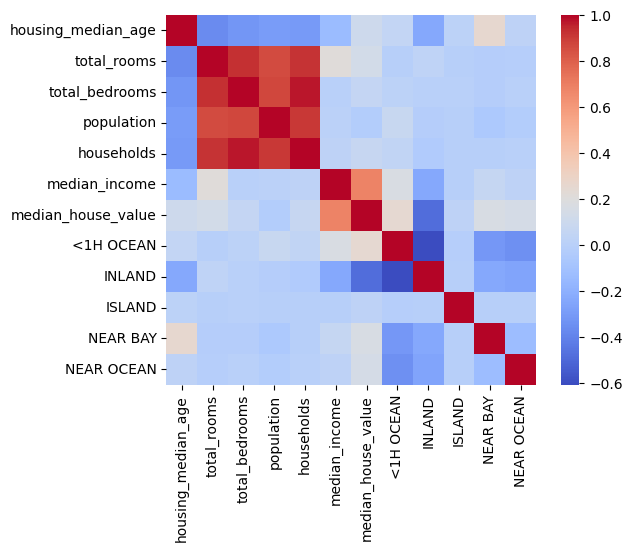

In [115]:
corr_mat = data_stand.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
corr_mat > 0.1

Будем использовать все входные признаки кроме 'INLAND', 'NEAR BAY', 'NEAR OCEAN'



In [116]:
data_stand.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', '<1H OCEAN',
       'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [117]:
X = data_stand.drop(['median_income', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], axis=1)
# X = data_stand.drop(['median_income'], axis=1)
y = data_new['median_income']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(15253, 5085)

Линейная регрессия

In [119]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [120]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [121]:
lr_model.coef_

array([-0.28864621,  1.84844422, -1.52029149,  0.07094098, -0.39942862,
        1.06594706,  0.07871689, -0.03416235])

In [122]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(1.010027586870723, 1.0308910556697153, 0.6684668101385769, 0.665226429992259)

Результаты конечно не радуют, но чем богаты

In [123]:
lr_model.score(X_train, y_train)

0.6684668101385769

Делаем из столбца median_income булевый столбец
Пусть если значение было > 0 то это класс выше среднего, остальные ниже среднего

In [124]:
for i in range(len(data_stand)):
  if data_stand['median_income'][i]>0:
    data_stand['median_income'][i] = 1
  else :
    data_stand['median_income'][i] = 0
data_stand

housing_median_age  total_rooms  total_bedrooms  population  \
0                0.987833    -0.810802       -0.973655   -0.982332   
1               -0.604481     2.039378        1.351250    0.855889   
2                1.863606    -0.541779       -0.828497   -0.828484   
3                1.863606    -0.630231       -0.721414   -0.773664   
4                1.863606    -0.468450       -0.614330   -0.767475   
...                   ...          ...             ...         ...   
20333           -0.286018    -0.451035       -0.390644   -0.519903   
20334           -0.843328    -0.894671       -0.923683   -0.952270   
20335           -0.922944    -0.181095       -0.126504   -0.376665   
20336           -0.843328    -0.361666       -0.307357   -0.611858   
20337           -1.002560     0.062263        0.185228   -0.040675   

       households  median_income  median_house_value  <1H OCEAN    INLAND  \
0       -0.984378            1.0            2.168856  -0.894039 -0.679077   
1        1.661825            1.0            1.339580  -0.894039 -0.679077   
2       -0.851022            1.0            1.283178  -0.894039 -0.679077   
3       -0.741199            1.0            1.188001  -0.894039 -0.679077   
4       -0.636606            1.0            1.195932  -0.894039 -0.679077   
...           ...            ...                 ...        ...       ...   
20333   -0.450953            0.0           -1.131506  -0.894039  1.472515   
20334   -1.015756            0.0           -1.140319  -0.894039  1.472515   
20335   -0.181626            0.0           -1.006365  -0.894039  1.472515   
20336   -0.401272            0.0           -1.073342  -0.894039  1.472515   
20337    0.072012            0.0           -1.031922  -0.894039  1.472515   

         ISLAND  NEAR BAY  NEAR OCEAN  
0     -0.015681  2.833140   -0.385037  
1     -0.015681  2.833140   -0.385037  
2     -0.015681  2.833140   -0.385037  
3     -0.015681  2.833140   -0.385037  
4     -0.015681  2.833140   -0.385037  
...         ...       ...         ...  
20333 -0.015681 -0.352948   -0.385037  
20334 -0.015681 -0.352948   -0.385037  
20335 -0.015681 -0.352948   -0.385037  
20336 -0.015681 -0.352948   -0.385037  
20337 -0.015681 -0.352948   -0.385037  

[20338 rows x 12 columns]

Классифицируем значения с помощью к ближайших


In [125]:
y = data_stand['median_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

y_train

from sklearn.neighbors import KNeighborsClassifier


In [126]:
k_neigh = KNeighborsClassifier(n_neighbors=2)
k_neigh.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [127]:
from sklearn.metrics import confusion_matrix

Посмотрим путанницу на трейне

In [128]:
pred_test = k_neigh.predict(X_train)
confusion_matrix(y_train,pred_test)

array([[8744,    0],
       [1454, 5055]])

Не очень хорошо
Но посмотрим что выдаст трейн и его ошибку

In [129]:
pred_test = k_neigh.predict(X_test)
confusion_matrix(y_test,pred_test)

array([[2675,  280],
       [ 756, 1374]])

In [130]:
err_test  = np.mean(y_test  != pred_test)
err_test

0.20373647984267454

Не хорошо. Попробуем найти оптимальный параметр для k ближайших

In [131]:
error_rates = []
for i in np.arange(1, 30):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

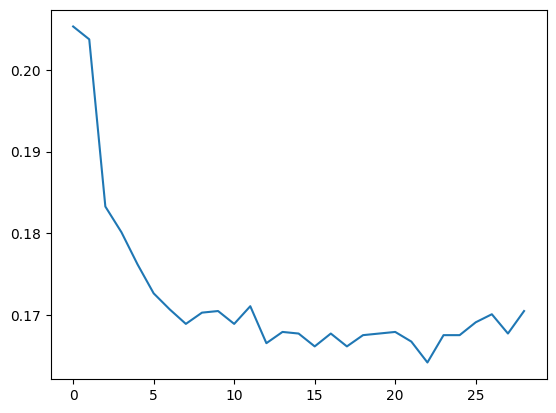

In [132]:
plt.plot(error_rates)

Теперь с этим параметром проводим аналогичные тесты

In [133]:
min(error_rates)
ind = error_rates.index(min(error_rates))

new_model = KNeighborsClassifier(n_neighbors = ind)
new_model.fit(X_train, y_train)
new_predictions = new_model.predict(X_train)
confusion_matrix(y_train,new_predictions)


array([[7697, 1047],
       [1244, 5265]])

In [134]:
err_test  = np.mean(y_train  != new_predictions)
err_test

0.15019996066347605

In [135]:
new_predictions = new_model.predict(X_test)
confusion_matrix(y_test,new_predictions)

array([[2547,  408],
       [ 440, 1690]])

In [136]:
err_test  = np.mean(y_test  != new_predictions)
err_test

0.16676499508357914

Результаты стали лучше, но все же хотелось большего результата.
возможно метод k ближайших не подходит для решения данной задачи

Логистическая регрессия


In [137]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [138]:
y_test_predict = log.predict(X_test)
y_train_predict = log.predict(X_train)

In [139]:
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.1501343997902052

In [140]:
confusion_matrix(y_train, y_train_predict)

array([[7883,  861],
       [1429, 5080]])

In [141]:
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.15555555555555556

In [142]:
confusion_matrix(y_test, y_test_predict)

array([[2649,  306],
       [ 485, 1645]])

Результат практически аналогичный k ближайшим, но все же получше


#Часть домашки к 28 декадря


###Логистическая регрессия но для других признаков

In [143]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn. preprocessing import normalize

In [144]:
data = pd.read_csv('housing.csv')
X_ = data.drop(['ocean_proximity','total_bedrooms'], axis=1)
y = data['ocean_proximity']
X = (X_ - X_.mean(axis = 0))/X_.std(axis = 0)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,
    stratify=y, random_state=42
)

In [146]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
y_test_predict = log.predict(X_test)
y_train_predict = log.predict(X_train)

In [148]:
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.1939922480620155

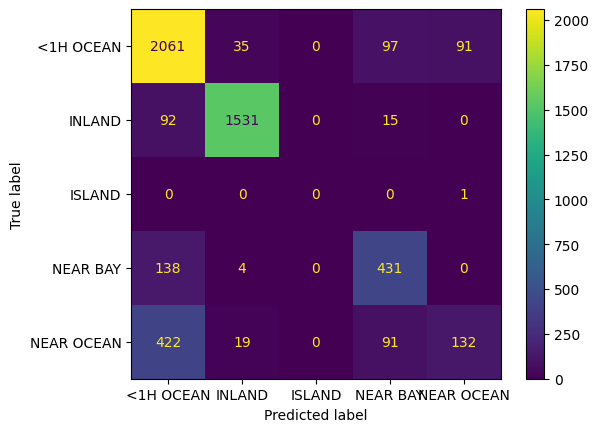

In [149]:
predictions = log.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
disp.plot()

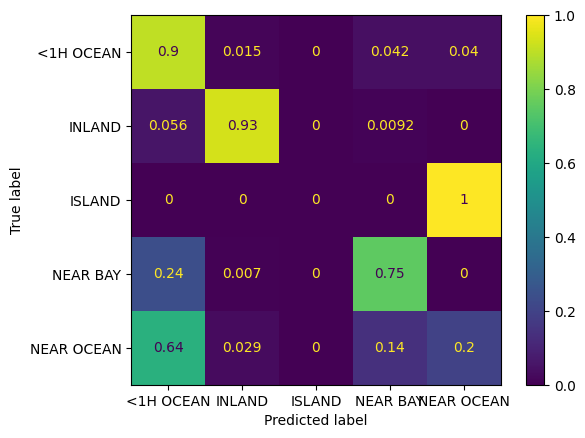

In [150]:
predictions = log.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=log.classes_)
cm = normalize(cm, axis= 1 , norm='l1')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
disp.plot()

###Рандом форест

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import rand_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [152]:
pred_labeles = dtc.predict(X_test)
rand_s = rand_score(y_test, pred_labeles)
print('Оценка RAND: ', rand_s)

Оценка RAND:  0.9729632568056726


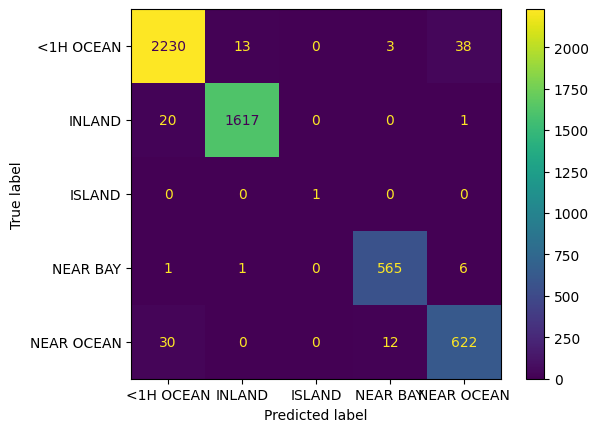

In [153]:
predictions = dtc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()

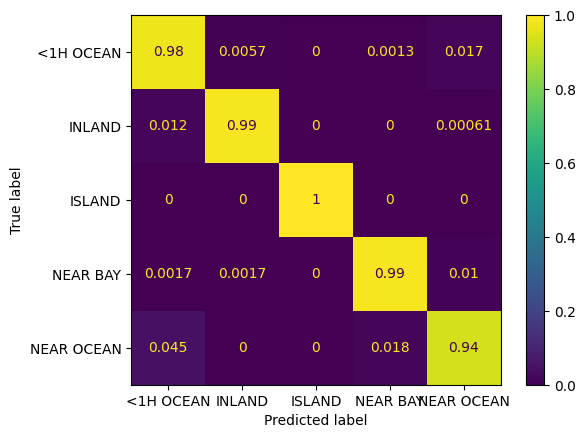

In [154]:
predictions = dtc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=dtc.classes_)
cm = normalize(cm, axis= 1 , norm='l1')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()

###Нейронная сеть

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow import keras,convert_to_tensor,int64
from keras.layers import Dense, Flatten, Reshape, Input
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [219]:
X_tt, X_tr, y_tt, y_tr = X_test,X_train,y_test,y_train
y_test

4607      <1H OCEAN
9173      <1H OCEAN
14119    NEAR OCEAN
12911        INLAND
4656      <1H OCEAN
            ...    
1973         INLAND
1752       NEAR BAY
8966      <1H OCEAN
1292         INLAND
17367     <1H OCEAN
Name: ocean_proximity, Length: 5160, dtype: object

In [228]:
y_test_new = pd.get_dummies(y_tt)
y_train_new = pd.get_dummies(y_tr)

0  1  2  3  4
5952   1  0  0  0  0
2130   1  0  0  0  0
14163  0  1  0  0  0
1417   0  0  1  0  0
8771   0  0  0  1  0
...   .. .. .. .. ..
4534   0  0  0  1  0
4665   0  0  0  1  0
19307  0  0  0  1  0
18559  0  1  0  0  0
6241   0  0  0  1  0

[15480 rows x 5 columns]

In [ ]:
# Создание модели для бинарной классификации
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train_new, epochs=20, batch_size=32, validation_split=0.2)

In [231]:
# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test_new, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

162/162 [==============================] - 1s 3ms/step
Mean Squared Error on Test Set: 0.030325334519147873


Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.6063 - val_loss: 0.2723 - val_accuracy: 0.7348
Epoch 2/20
387/387 [==============================] - 1s 2ms/step - loss: 0.2478 - accuracy: 0.7589 - val_loss: 0.2307 - val_accuracy: 0.7749
Epoch 3/20
387/387 [==============================] - 1s 2ms/step - loss: 0.2144 - accuracy: 0.7793 - val_loss: 0.1951 - val_accuracy: 0.7865
Epoch 4/20
387/387 [==============================] - 1s 2ms/step - loss: 0.1780 - accuracy: 0.8191 - val_loss: 0.1672 - val_accuracy: 0.8395
Epoch 5/20
387/387 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.8444 - val_loss: 0.1479 - val_accuracy: 0.8498
Epoch 6/20
387/387 [==============================] - 1s 2ms/step - loss: 0.1449 - accuracy: 0.8519 - val_loss: 0.1407 - val_accuracy: 0.8608
Epoch 7/20
387/387 [==============================] - 1s 2ms/step - loss: 0.1379 - accuracy: 0.8545 - val_loss: 0.1337 - val_accuracy: 0.8679
Epoch 

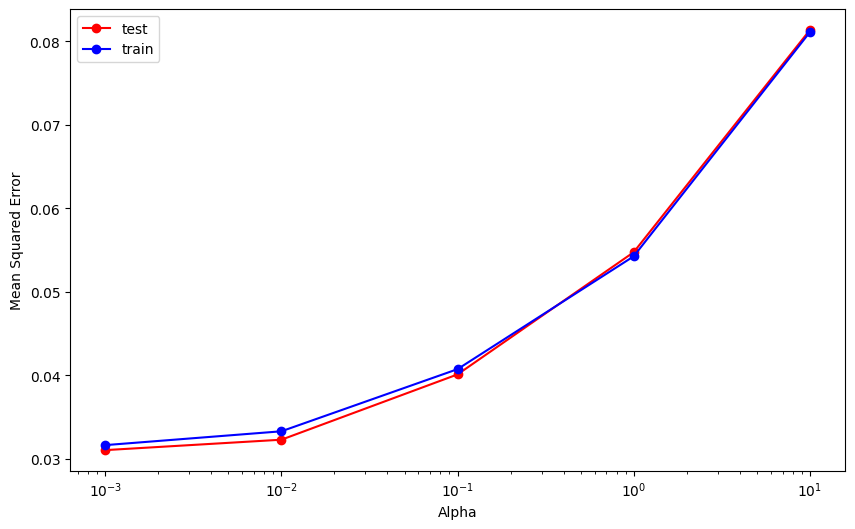

In [235]:
from sklearn.model_selection import ParameterGrid
from keras import regularizers

# Подготовка данных
X_tt, X_tr, y_tt, y_tr = X_test,X_train,y_test,y_train
y_test_new = pd.get_dummies(y_tt)
y_train_new = pd.get_dummies(y_tr)

# Определение значений параметра alpha, которые вы хотите проверить
alphas = [0.001, 0.01, 0.1, 1, 10]

# Список для хранения результатов
mse_results = []
mse_results_train = []

# Перебор значений параметра alpha
for alpha in alphas:
    # Создание модели для бинарной классификации
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(alpha)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(5, activation='sigmoid'))

    # Компиляция модели
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Обучение модели
    model.fit(X_train, y_train_new, epochs=20, batch_size=32, validation_split=0.2)

    # Оценка модели на обучающих данных
    y_pred_t = model.predict(X_train)
    mse = mean_squared_error(y_train_new, y_pred_t)

    # Оценка модели на тестовых данных
    y_pred = model.predict(X_test)
    mse_t = mean_squared_error(y_test_new, y_pred)

    # Сохранение результатов
    mse_results.append(mse)
    mse_results_train.append(mse_t)

# Построение графика зависимости ошибки от параметра alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_results,'red',label='test', marker='o')
plt.plot(alphas, mse_results_train,'blue', label='train',marker='o')
plt.xscale('log')  # Логарифмическая шкала для alpha
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()
#plt.title('Error vs. Alpha')
plt.show()

162/162 [==============================] - 0s 1ms/step


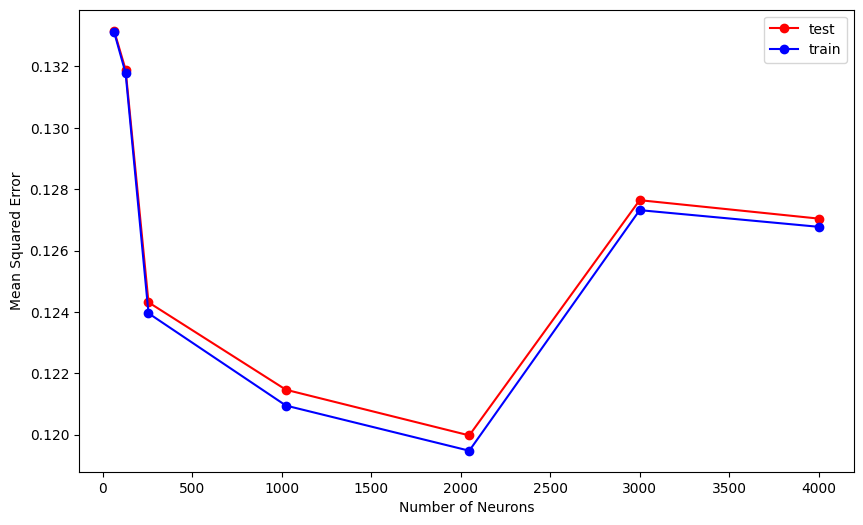

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Подготовка данных
X_tt, X_tr, y_tt, y_tr = X_test,X_train,y_test,y_train
y_test_new = pd.get_dummies(y_tt)
y_train_new = pd.get_dummies(y_tr)

# Определение значений количества нейронов, которые вы хотите проверить
neurons_list = [64, 128, 256, 1024, 2048, 3000, 4000]

# Список для хранения результатов
mse_results = []
mse_results_train = []

# Перебор значений количества нейронов
for neurons in neurons_list:
    # Создание модели
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(alpha)))
    model.add(Dense(5, activation='sigmoid'))

    # Компиляция модели
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Обучение модели
    model.fit(X_train, y_train_new, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

    # Оценка модели на обучающих данных
    y_pred_t = model.predict(X_train)
    mse_t = mean_squared_error(y_train_new, y_pred_t)

    # Оценка модели на тестовых данных
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test_new, y_pred)

    # Сохранение результатов
    mse_results.append(mse)
    mse_results_train.append(mse_t)

# Построение графика зависимости ошибки от количества нейронов
plt.figure(figsize=(10, 6))
plt.plot(neurons_list, mse_results,'red',label='test', marker='o')
plt.plot(neurons_list, mse_results_train,'blue', label='train', marker='o')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Squared Error')
plt.legend()
#plt.title('Error vs. Number of Neurons')
plt.show()